PLA6619 Introduction to Urban Data and Informatics\
Week04


---


# Lab 03


## Today's Agenda

1. More data manipulation practice with Pandas
2. Exploratory Data Analysis + Intro to Data Visualization using Matplotlib

## Resources
* Python Data Science Handbook: Essential Tools for Working with Data by Jake VanderPlas (https://jakevdp.github.io/PythonDataScienceHandbook/).
* Matplotlib resources (https://matplotlib.org/)
* Python colors (https://matplotlib.org/gallery/color/named_colors.html)

## Load required packages

In [ ]:
# To ignore unimporant system warnings
import warnings
warnings.filterwarnings("ignore")

# Import Pandas, Numpy, and Matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# A magic functin that renders figures in a notebook
%matplotlib inline

# PART 1. Data Preparation

## 1. Load Datasets

* `'nyc_covid_updated_09272020.csv'`, NYC COVID-19 data at zipcode level, updated September 27th 2020 (https://github.com/nychealth/coronavirus-data/blob/master/data-by-modzcta.csv)
* `'nyc_var.csv'`, NYC zipcode level data on median income and average household size. The original data is from ACS.
* FYI, the second dataset has duplicates.

In [ ]:
# Load Covid-19 Data
# If you already know the column information of the dataset, you can specify data type while loading, by using dtype
df_covid = pd.read_csv('../Intro to Urban Data (GSAPP, 2023)/Data/nyc_covid_upated_09272020.csv', dtype={'Zipcode':str})
df_covid.head(2)

,Zipcode,NEIGHBORHOOD_NAME,BOROUGH_GROUP,COVID_CASE_COUNT,COVID_CASE_RATE,POP_DENOMINATOR,COVID_DEATH_COUNT,COVID_DEATH_RATE,PERCENT_POSITIVE,TOTAL_COVID_TESTS
0,10001,Chelsea/NoMad/West Chelsea,Manhattan,459,1947.97,23563.03,27,114.59,5.47,8395
1,10002,Chinatown/Lower East Side,Manhattan,1372,1787.50,76755.41,161,209.76,6.55,20933


In [ ]:
# Load Neighborhood Variable Data
df_var = pd.read_csv('../Intro to Urban Data (GSAPP, 2023)/Data/nyc_var.csv', dtype={'Zipcode':str})
df_var.head(2)

,Zipcode,med_income,avg_hh_size
0,10001,88526.0,2.225
1,10002,35859.0,2.180


## 2. Check duplicate data
* There should only be unique values in the 'Zipcode' column.
* Syntax:
    
     `DATAFRAME_NAME.duplicated()` --> this returns boolean series with true value for each duplicated row
     `DATAFRAME_NAME.duplicated().sum()` --> this returns total number of duplicated rows

In [ ]:
# For the covid data
print (df_covid.duplicated().sum())

# For the variable data
print (df_var.duplicated().sum())

0
7


## 3. Remove duplicated rows
* Syntax:

        DATAFRAME_NAME.drop_duplicates()

In [ ]:
print (len(df_var))
df_var = df_var.drop_duplicates()
print (len(df_var))

184
177


## 4. Join two datasets
![title](https://pandas.pydata.org/pandas-docs/stable/_images/merging_merge_on_key.png)
* We are trying to join two tables (df_covid and df_var) based on a common column: 'Zipcode'
* If you want to learn more about merge, join, or concatenate functions of Pandas, here is a useful link (https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)

* Syntax:
    `pd.merge(left_data, right_data, how= , on= )`

In [ ]:
df = pd.merge(df_covid, df_var, on='Zipcode', how='left')
df.head(2)

,Zipcode,NEIGHBORHOOD_NAME,BOROUGH_GROUP,COVID_CASE_COUNT,COVID_CASE_RATE,POP_DENOMINATOR,COVID_DEATH_COUNT,COVID_DEATH_RATE,PERCENT_POSITIVE,TOTAL_COVID_TESTS,med_income,avg_hh_size
0,10001,Chelsea/NoMad/West Chelsea,Manhattan,459,1947.97,23563.03,27,114.59,5.47,8395,88526.0,2.225
1,10002,Chinatown/Lower East Side,Manhattan,1372,1787.50,76755.41,161,209.76,6.55,20933,35859.0,2.180


# PART 2. Exploratory Data Analysis
## 1. Descriptive Statistics
* `.describe` is a magic function to print out descriptive stats of all columns

In [ ]:
# .describe is a function to print out descriptive statistics of all columns
# .round() is a function for rounding up
df.describe().round(2)

,COVID_CASE_COUNT,COVID_CASE_RATE,POP_DENOMINATOR,COVID_DEATH_COUNT,COVID_DEATH_RATE,PERCENT_POSITIVE,TOTAL_COVID_TESTS,med_income,avg_hh_size
count,177.00,177.00,177.00,177.00,177.00,177.00,177.00,177.00,177.00
mean,1309.02,2665.78,47425.73,108.07,213.54,9.74,13206.15,73904.98,2.64
std,920.65,934.14,26411.13,86.14,114.02,3.69,7298.06,36877.85,0.50
min,45.00,686.16,3457.77,0.00,0.00,2.94,1033.00,21149.00,1.57
25%,616.00,1951.58,26614.42,42.00,142.25,7.05,7627.00,50832.00,2.27
50%,1001.00,2723.96,43030.43,86.00,205.71,10.30,11759.00,66483.00,2.67
75%,1848.00,3341.25,67089.29,154.00,265.56,12.89,18769.00,88526.00,2.96
max,5168.00,4846.11,111594.10,447.00,716.97,15.94,35286.00,250001.00,3.97


## 2. Histogram

<Axes: >

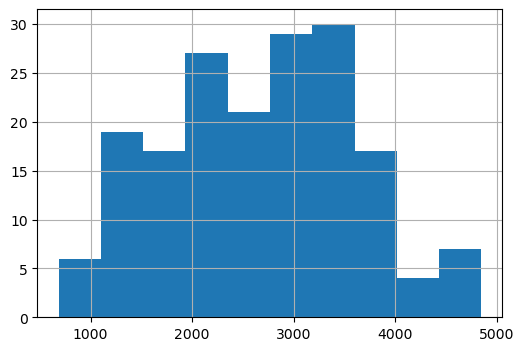

In [ ]:
# Default setting
fig = plt.figure(figsize=(6,4))# width, height in inches
df['COVID_CASE_RATE'].hist()

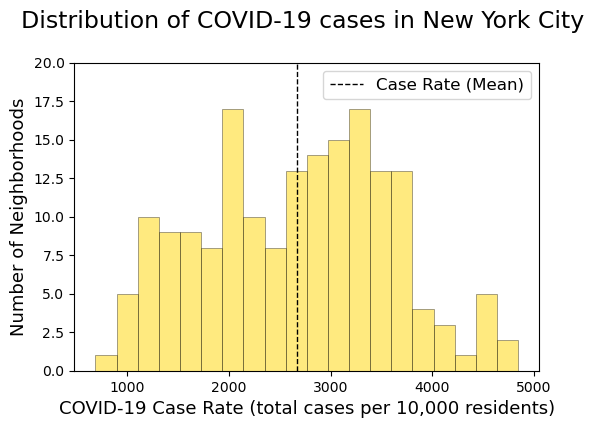

In [ ]:
fig = plt.figure(figsize=(6,4)) # width, height in inches
df['COVID_CASE_RATE'].hist(bins=20, color='Gold', edgecolor='k', linewidth=0.5, alpha=0.5)
plt.grid(False) # If you make this True, then the gird will be shown

# Plot vertical line (mean)
plt.axvline(df['COVID_CASE_RATE'].mean(), color='black', linewidth=1, linestyle='--', label="Case Rate (Mean)")

#Adjust labels (x axis and y axis)
plt.ylabel('Number of Neighborhoods', fontsize=13)
plt.xlabel('COVID-19 Case Rate (total cases per 10,000 residents)', fontsize=13)
plt.ylim(0,20)

#Legend, title & export
plt.title('Distribution of COVID-19 cases in New York City \n', fontsize=17)
plt.legend(fontsize=12)

plt.show()# you can disregard this line but if you use plt.show() then just plot is shown without any processing text

## 3. Plotting multiple plots at the same time

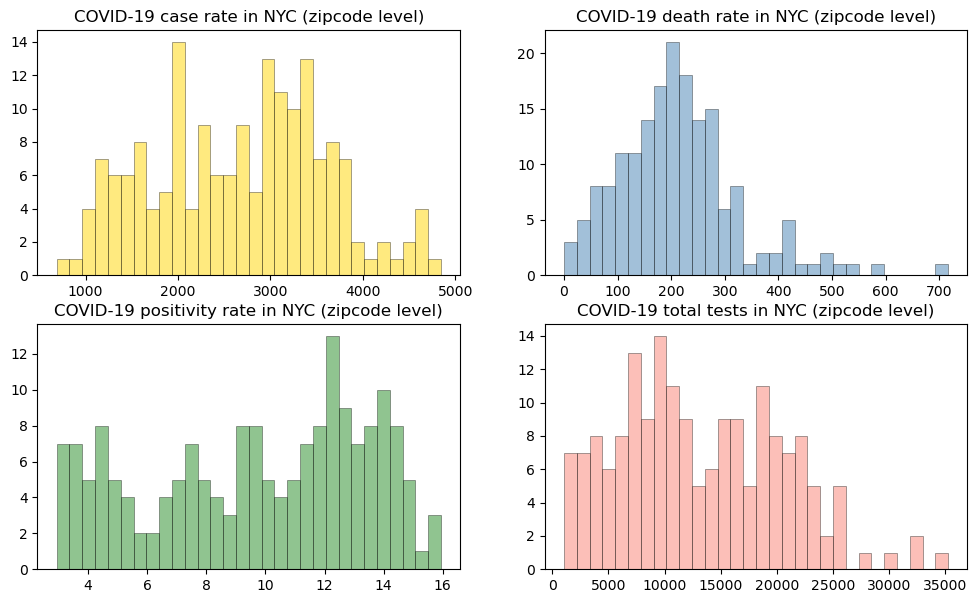

In [ ]:
plt.figure(figsize=(12,7)) # define your figure

plt.subplot(2,2,1) # first plot of two by two
df['COVID_CASE_RATE'].hist(bins=30, color='Gold',edgecolor='black', linewidth=0.5, alpha=0.5) # histogram from pandas dataframe
plt.title('COVID-19 case rate in NYC (zipcode level)')
plt.grid(False)

plt.subplot(2,2,2) # second plot
df['COVID_DEATH_RATE'].hist(bins=30, color='SteelBlue',edgecolor='black', linewidth=0.5, alpha=0.5) # histogram from pandas dataframe
plt.title('COVID-19 death rate in NYC (zipcode level)')
plt.grid(False)

plt.subplot(2,2,3) # third plot
df['PERCENT_POSITIVE'].hist(bins=30, color='forestgreen',edgecolor='black', linewidth=0.5, alpha=0.5) # histogram from pandas dataframe
plt.title('COVID-19 positivity rate in NYC (zipcode level)')
plt.grid(False)

plt.subplot(2,2,4) # fourth plot
df['TOTAL_COVID_TESTS'].hist(bins=30, color='salmon',edgecolor='black', linewidth=0.5, alpha=0.5) # histogram from pandas dataframe
plt.title('COVID-19 total tests in NYC (zipcode level)')
plt.grid(False)

## 4. Scatter plot
* Syntax:

    `plt.scatter(DATAFRAME['COLUMN1'],DATAFRAME['COLUMN2'])` or
    `sns.regplot(x='COLUMN1', y='COLUMN2', data=DATA)`

Text(0, 0.5, 'COVID-19 case rate at zipcode level')

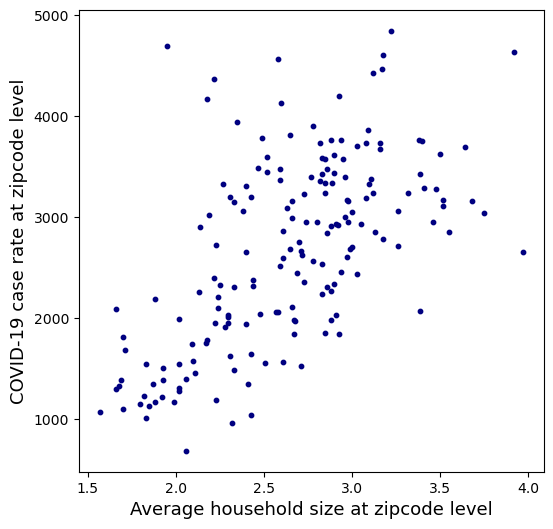

In [ ]:
fig = plt.figure(figsize=(6,6))
plt.scatter(df['avg_hh_size'], df['COVID_CASE_RATE'], s=10, c='Navy')

plt.xlabel('Average household size at zipcode level', fontsize=13)
plt.ylabel('COVID-19 case rate at zipcode level', fontsize=13)

In [ ]:
import seaborn as sns # useful data viz package with Matplotlib

<Axes: xlabel='avg_hh_size', ylabel='COVID_CASE_RATE'>

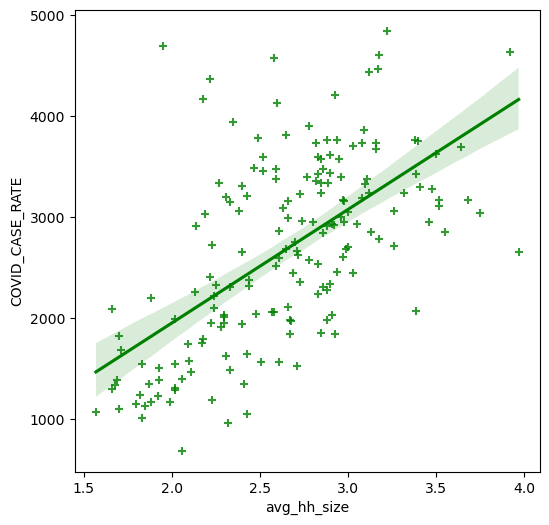

In [ ]:
# Using seaborn package
plt.figure(figsize=(6,6))
sns.regplot(x = 'avg_hh_size', y = 'COVID_CASE_RATE', data=df, marker='+', ci=95, color='green')

## 5. Correlation plots (scatter matrix plots) and correlation test

Compute pairwise correlation of columns, excluding NA/null values

Method of correlation
* pearson : standard correlation coefficient (Default)
* kendall : Kendall Tau correlation coefficient
* spearman : Spearman rank correlation


In [ ]:
from pandas.plotting import scatter_matrix

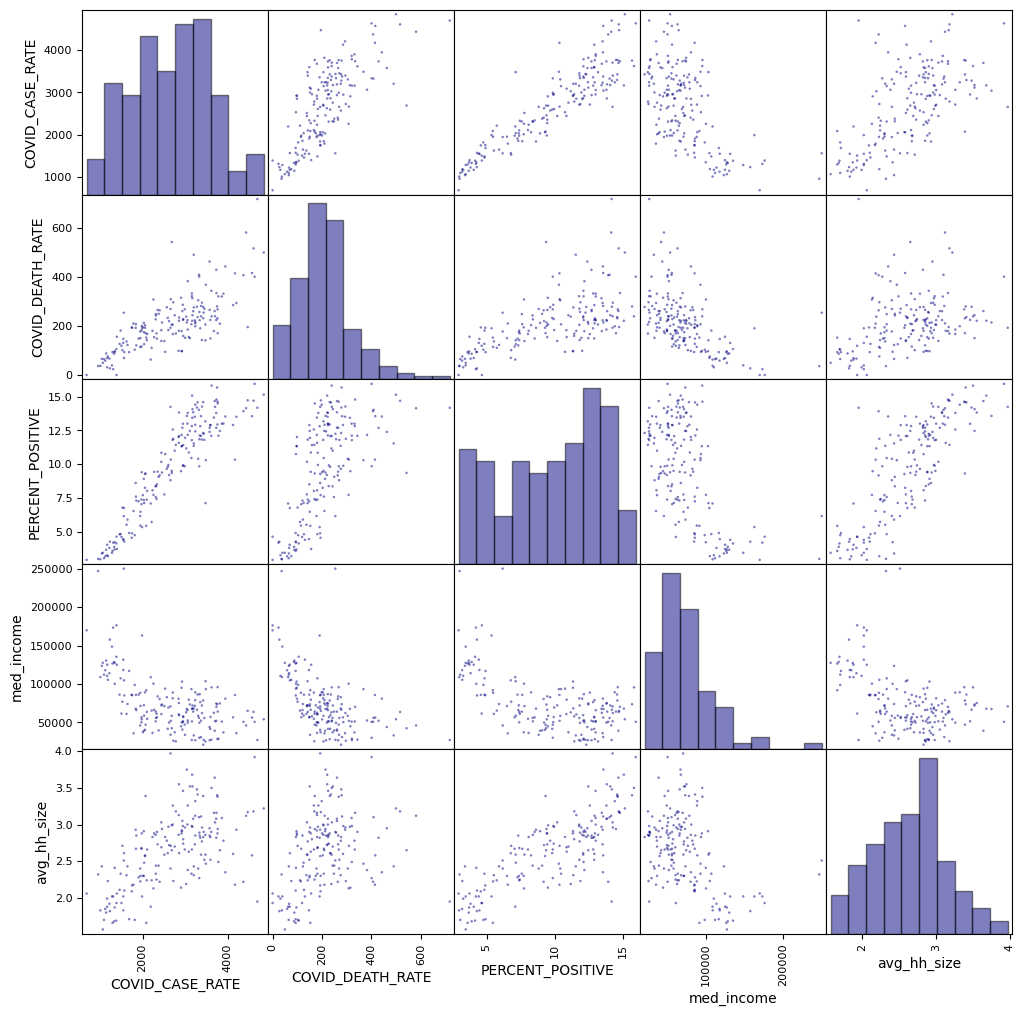

In [ ]:
scatter_matrix(df[['COVID_CASE_RATE','COVID_DEATH_RATE', 'PERCENT_POSITIVE', 'med_income', 'avg_hh_size']],
               figsize=(12,12), hist_kwds={'color':'Navy', 'edgecolor':'k', 'alpha':0.5},
              s=13, color='Navy')
plt.show()

In [ ]:
# defalt; person
df[['COVID_CASE_RATE','COVID_DEATH_RATE', 'PERCENT_POSITIVE', 'med_income', 'avg_hh_size']].corr()

,COVID_CASE_RATE,COVID_DEATH_RATE,PERCENT_POSITIVE,med_income,avg_hh_size
COVID_CASE_RATE,1.000000,0.747249,0.914193,-0.582464,0.607544
COVID_DEATH_RATE,0.747249,1.000000,0.640988,-0.533744,0.338057
PERCENT_POSITIVE,0.914193,0.640988,1.000000,-0.590667,0.798336
med_income,-0.582464,-0.533744,-0.590667,1.000000,-0.442820
avg_hh_size,0.607544,0.338057,0.798336,-0.442820,1.000000


## 6. Heatmap

<Axes: >

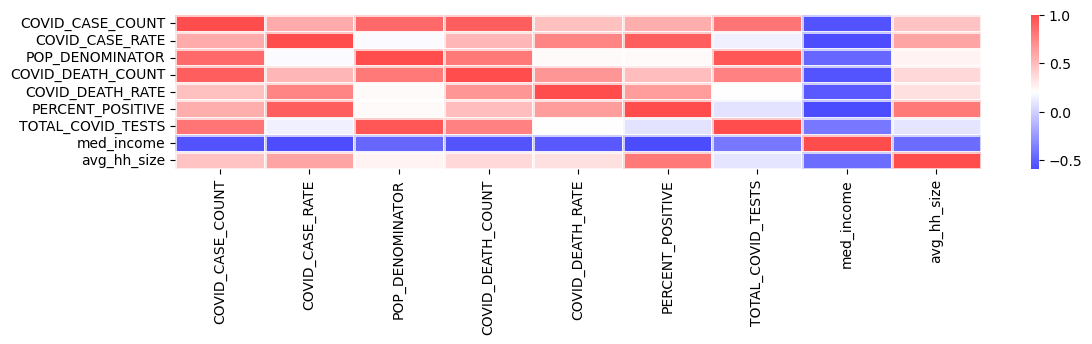

In [ ]:
plt.figure(figsize=(13,2))
sns.heatmap(df.corr(), cmap='bwr', linewidth=1, alpha=0.7)

<Axes: >

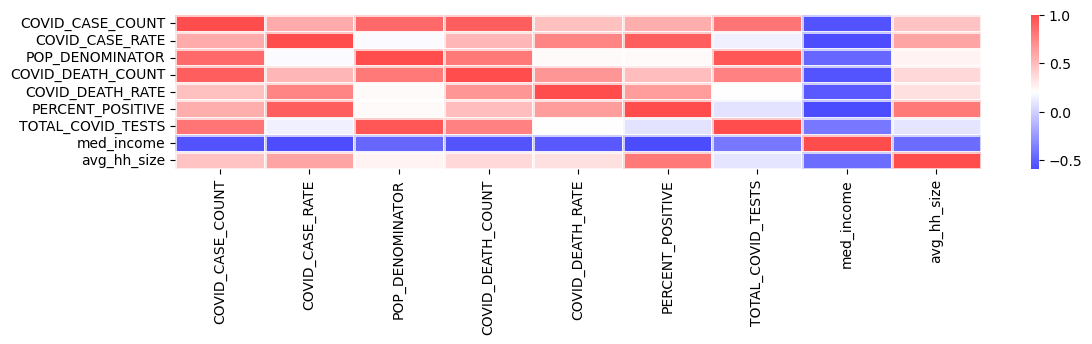

In [ ]:
# # Set up the matplotlib figure
f, ax = plt.subplots(figsize=(13, 2))

# # plot the heatmap and annotation on it
sns.heatmap(df.corr(), cmap='bwr', linewidth=1, alpha=0.7)

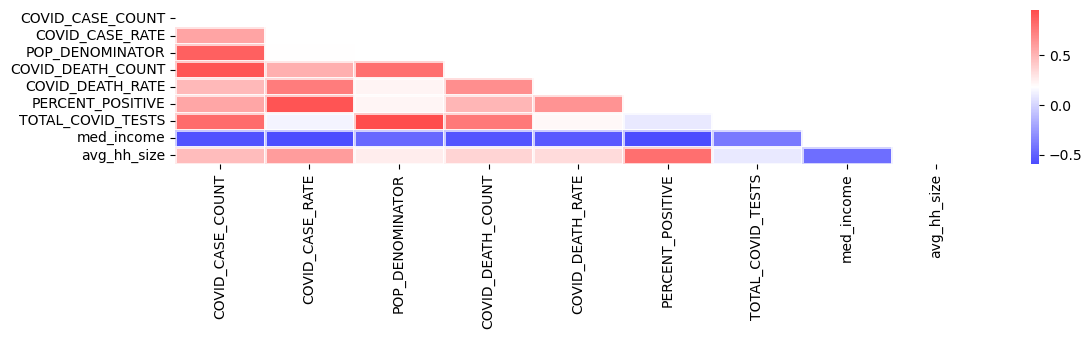

In [ ]:
plt.figure(figsize=(13,2))
mask = np.zeros_like(df.corr(), dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True # Mark 'true' for the upper-triangle

# plot the heatmap
sns.heatmap(df.corr(), cmap='bwr', linewidth=1, alpha=0.7, mask=mask)

plt.show()

<Axes: >

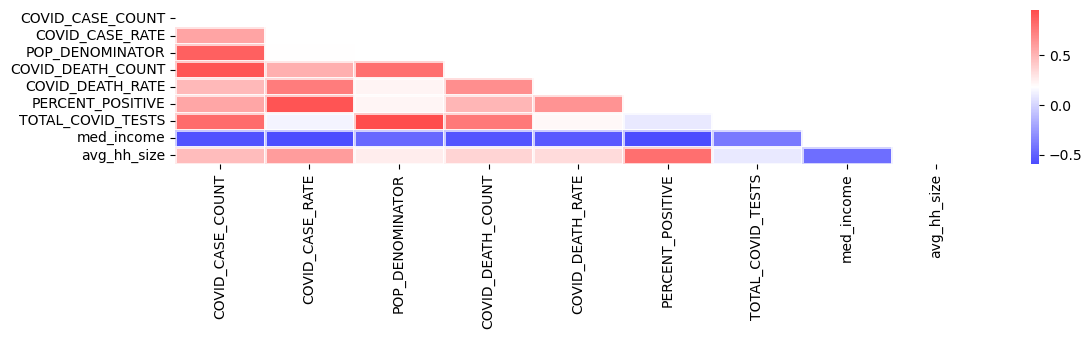

In [ ]:
# # Set up the matplotlib figure
f, ax = plt.subplots(figsize=(13, 2))

# # Generate a mask for the upper triangle
mask = np.zeros_like(df.corr(), dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True # Mark 'true' for the upper-triangle

# # plot the heatmap and annotation on it
sns.heatmap(df.corr(), cmap='bwr', linewidth=1, alpha=0.7, mask=mask)

## 7. Line plot (applicable to timeseries)
* X-axis is based on the index of the dataframe

In [ ]:
# set the index of the dataframe (zipcode)
df.index = df['Zipcode']
df.head(2)

,Zipcode,NEIGHBORHOOD_NAME,BOROUGH_GROUP,COVID_CASE_COUNT,COVID_CASE_RATE,POP_DENOMINATOR,COVID_DEATH_COUNT,COVID_DEATH_RATE,PERCENT_POSITIVE,TOTAL_COVID_TESTS,med_income,avg_hh_size
Zipcode,,,,,,,,,,,,
10001,10001,Chelsea/NoMad/West Chelsea,Manhattan,459,1947.97,23563.03,27,114.59,5.47,8395,88526.0,2.225
10002,10002,Chinatown/Lower East Side,Manhattan,1372,1787.50,76755.41,161,209.76,6.55,20933,35859.0,2.180


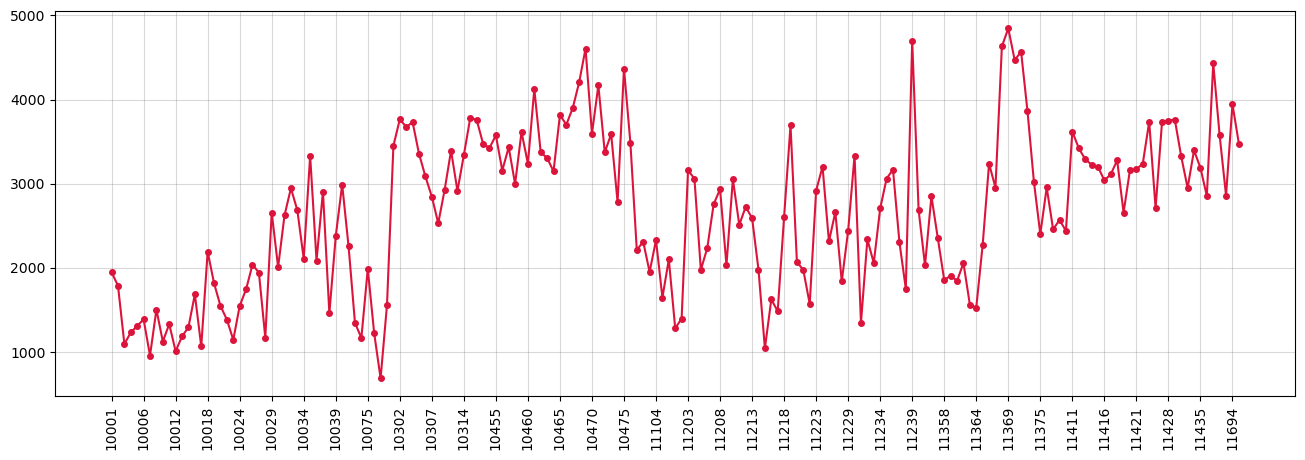

In [ ]:
fig = plt.figure(figsize=(16,5))
plt.plot(df['COVID_CASE_RATE'], color='crimson', marker='o', markersize=4)

# Specify x-axis ticks
plt.xticks(range(len(df))[::5], df['Zipcode'].tolist()[::5], rotation=90)
plt.grid(color='grey', alpha=0.3)
plt.show()

## 8. Bar charts (using groupby)
* Basic syntax to plot a bar chart is
        
        plt.bar(keys, values)

In [ ]:
df_boro = df.groupby('BOROUGH_GROUP').mean(numeric_only=True).reset_index()
df_boro.head()

,BOROUGH_GROUP,COVID_CASE_COUNT,COVID_CASE_RATE,POP_DENOMINATOR,COVID_DEATH_COUNT,COVID_DEATH_RATE,PERCENT_POSITIVE,TOTAL_COVID_TESTS,med_income,avg_hh_size
0,Bronx,2085.240000,3620.855200,57387.706000,160.400000,274.262800,12.500400,16463.000000,43566.560000,2.761200
1,Brooklyn,1735.837838,2449.586486,69806.215946,153.405405,225.319189,9.417838,18295.783784,60649.324324,2.673243
2,Manhattan,676.590909,1746.797727,36635.079318,57.295455,138.560682,5.599773,11772.386364,104179.363636,2.096705
3,Queens,1188.305085,2962.868814,38791.691864,102.000000,243.388475,11.368305,10203.372881,71888.994350,2.927232
4,Staten Island,1288.250000,3251.510833,39681.584167,75.250000,178.931667,12.124167,10748.833333,76887.500000,2.832500


Text(0, 0.5, 'Average neighborhood Covid-19 case rate')

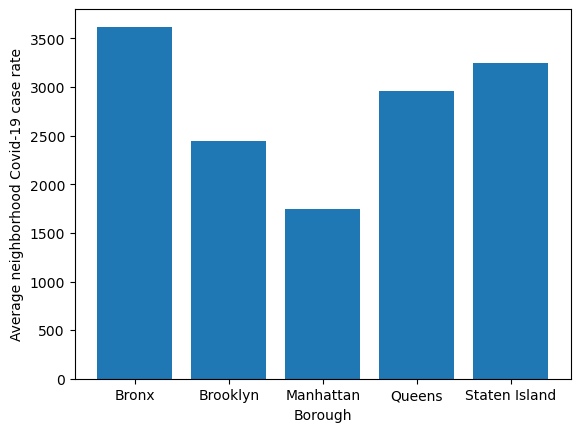

In [ ]:
plt.bar(df_boro['BOROUGH_GROUP'], df_boro['COVID_CASE_RATE'], )
plt.xlabel('Borough')
plt.ylabel('Average neighborhood Covid-19 case rate')

Text(0, 0.5, 'Average neighborhood Covid-19 case rate')

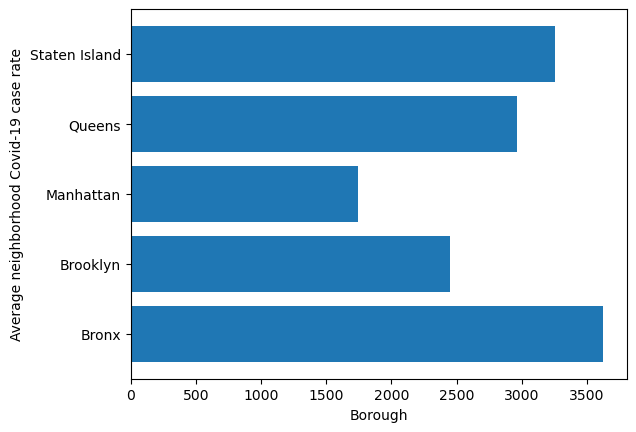

In [ ]:
plt.barh(df_boro['BOROUGH_GROUP'], df_boro['COVID_CASE_RATE'], )
plt.xlabel('Borough')
plt.ylabel('Average neighborhood Covid-19 case rate')

# Exercise 1: create a bar chart of total COVID-19 tests by boro

# Exercise 2: Load 311 data that we used last week and create a line chart of hourly 311 complaint volume based on timestamp information
* Data: `'../Intro to Urban Data (GSAPP, 2023)/Data/311_Service_Requests_09202022.csv'`
* Hint 1: you need to convert timestamp information into datetime data type `pd.to_datetime()`
* Hint 2: create a new column representing 'hour' information (i.e. `dt.hour`)